In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/My Drive/dataset/train 3.csv')

In [ ]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
l=data['label']
data=data.drop("label",axis=1)

In [ ]:
data

In [ ]:
import matplotlib.pyplot as plt

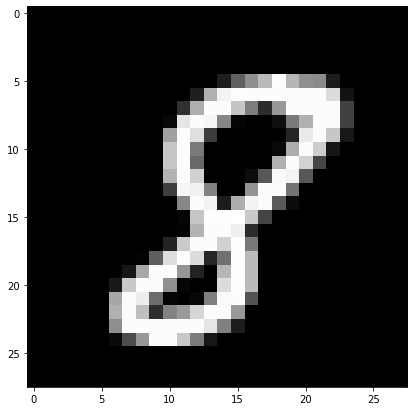

8


In [ ]:
plt.figure(figsize=(7,7))
idx=105
grid_data=np.array(data.iloc[idx]).reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(l[idx])

In [ ]:
labels=l.head(15000)
data=data.head(15000)

In [ ]:
data

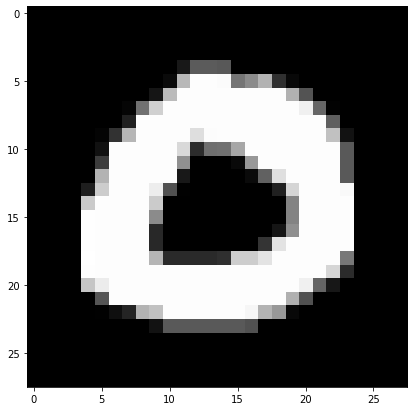

In [ ]:
plt.figure(figsize=(7,7))
idx=110
grid_data=np.array(data.iloc[idx]).reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [ ]:
data

In [ ]:
sample_data=standardized_data
covar_matrix=np.matmul(sample_data.T,sample_data)
print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [ ]:
covar_matrix

In [ ]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(782,783))
print("shape of eigen vectors =",vectors.shape)
vectors=vectors.T
print("Updates shape of eigen vectors=",vectors.shape)


shape of eigen vectors = (784, 2)
Updates shape of eigen vectors= (2, 784)


In [ ]:
vectors1

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
import matplotlib.pyplot as plt
new_coordinates=np.matmul(vectors,sample_data.T)
print("resultant new data points shape",vectors.shape,"X",sample_data.T.shape,"=",new_coordinates.shape)

resultant new data points shape (2, 784) X (784, 15000) = (2, 15000)


In [ ]:
new_coordinates

array([[-5.5586608 ,  6.19363477, -1.90987794, ..., -2.14793723,
         3.20412249, -6.87896871],
       [-5.04355835, 19.30527806, -7.67877525, ..., -1.50726893,
        -6.53731291, -1.25625388]])

In [ ]:
new_coordinates=np.vstack(((new_coordinates,labels))).T
dataframe=pd.DataFrame(data=new_coordinates,columns=("1st principal","2nd principal","label"))
print(dataframe.head())

   1st principal  2nd principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


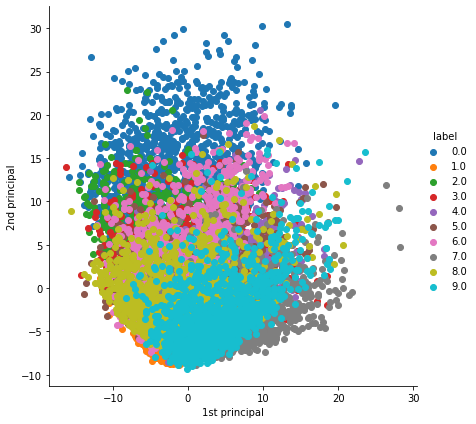

In [ ]:
import seaborn as sn
sn.FacetGrid(dataframe,hue="label",size=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA()


In [ ]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)

In [ ]:
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (15000, 2)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


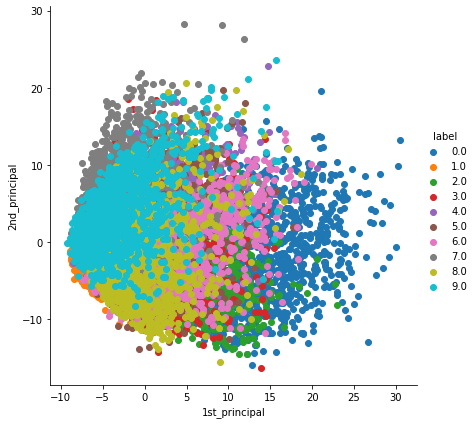

In [ ]:
pca_data=np.vstack((pca_data.T,labels)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA()

In [ ]:
pca.n_components=784
pca_data=pca.fit_transform(sample_data)


In [ ]:
pca_data

array([[-5.04355835e+00, -5.55866080e+00,  3.56339147e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.93052781e+01,  6.19363477e+00,  1.37625156e+00, ...,
        -4.95577914e-16,  4.20056430e-16,  6.58996130e-18],
       [-7.67877525e+00, -1.90987794e+00,  2.35419316e+00, ...,
         8.51640949e-16, -1.45305138e-15,  3.45547930e-16],
       ...,
       [-1.50726893e+00, -2.14793723e+00,  4.20128541e-02, ...,
        -4.15617926e-17, -8.90995251e-18,  5.26950059e-18],
       [-6.53731291e+00,  3.20412249e+00, -2.76389304e+00, ...,
        -4.63406411e-18, -4.69510322e-17,  9.22810041e-19],
       [-1.25625388e+00, -6.87896871e+00,  1.61118734e+00, ...,
         2.13508087e-17, -2.06734908e-17, -1.32828951e-17]])

In [ ]:
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_);

In [ ]:
cum_var_explained = np.cumsum(percentage_var_explained)

In [ ]:
percentage_var_explained.shape

(784,)

In [ ]:
cum_var_explained

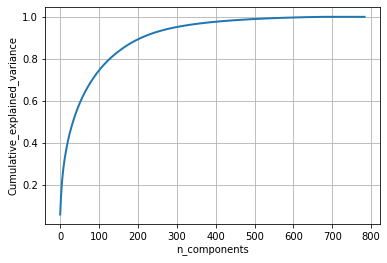

In [ ]:
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]


In [ ]:
model = TSNE(n_components=2, random_state=0)

In [ ]:
tsne_data = model.fit_transform(data_1000)

In [ ]:
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


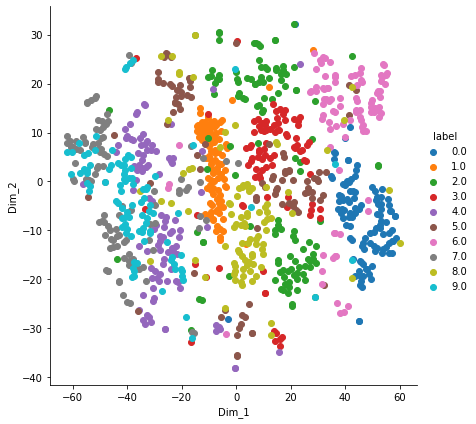

In [ ]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()